### Executive Summary

This report gives the analysis on the Financial Credit dataset and the
result obtained from the machine learning model (binary classifier) used to predict whether or not a
somebody will experience financial distress in the next two years.
The dataset consists of 150,000 records having 12 features. After performing
exploratory data analysis, data visualization, data cleaning, data processing, removal of outliers and feature engineering,
I was able to identify the features that are highly important for predicting the outcome of the
target variable, i.e. the probability that somebody will experience financial distress in the next two years. These features were further
used in several machine learning binary classifiers to predict the probability of a financial
distress. The xgboost machine learning binary classifier proved to be the best by
predicting the financial distress of somebody with an accuracy of 94%. Three new features were created (MonthlyDebtPaid, BalanceOpenCreditLinesAndLoans and AgeRatioDependent), while some of the highly correlated features were dropped (i.e. deleted)

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
plt.style.use('fivethirtyeight')
def ignore_warn(*args, **kwargs):
    pass
warnings.filterwarnings('ignore')

## Import the Dataset

In [2]:
df_train = pd.read_csv('./data/cs-training.csv')
df_test = pd.read_csv('./data/cs-test.csv')

### Preview of the dataset

In [3]:
df_train.head(3)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0


### Information about the dataset

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
Unnamed: 0                              150000 non-null int64
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


### Descriptive analysis of the dataset
This contains statistical information about the numerical features present in the dataset. These include: count (number of records), mean, standard deviation, minimum value, median (50%),  mode, etc.

In [5]:
df_train.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


### number of rows and columns present in the dataset

In [6]:
print(df_train.shape)
print(df_test.shape)

(150000, 12)
(101503, 12)


### check for duplicate records and delete them if present

In [7]:
print('shape before removing duplicate rows:', df_train.shape)
df_train.drop_duplicates()
print('shape after removing duplicate rows:', df_train.shape)

shape before removing duplicate rows: (150000, 12)
shape after removing duplicate rows: (150000, 12)


### count the number of missing values in each feature

In [8]:
# missing values
df_train.isnull().sum() #presence of missing values in the MonthlyIncome and NumberofDependents features

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

### Dealing with missing values
Percentage of missing values


,Total,Percent
DebtRatio,0,0.000000
MonthlyIncome,20103,0.198207
NumberOfDependents,2626,0.026160
NumberOfOpenCreditLinesAndLoans,0,0.000000
NumberOfTime30-59DaysPastDueNotWorse,0,0.000000


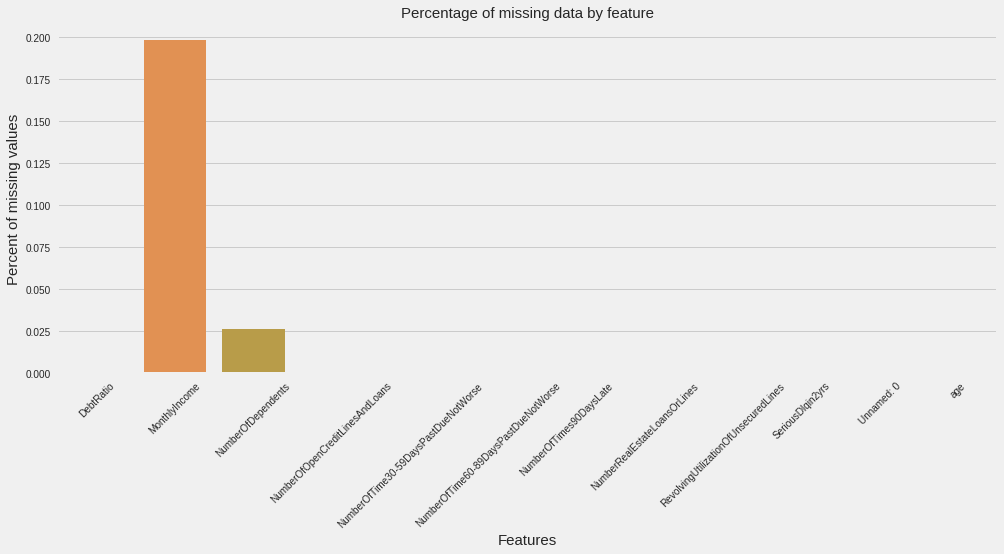

In [9]:
total = df_test.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='45')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percentage of missing data by feature', fontsize=15)
missing_data.head(5)

### drop the rows with missing values

In [10]:
## drop rows with missing values
print("shape before dropping missing rows", df_train.shape)
df_train_dropped = df_train.dropna()
print("shape after dropping missing rows", df_train_dropped.shape)

shape before dropping missing rows (150000, 12)
shape after dropping missing rows (120269, 12)


### the % of lost rows in the dataset

In [11]:
train_num_rows_lost = round(100*(df_train.shape[0] - df_train_dropped.shape[0])/float(df_train.shape[0]))
print("Lost {}% of rows in the train dataset".format(train_num_rows_lost)) ## lost about 20% of the rows from the train dataset

Lost 20% of rows in the train dataset


### the mean values of each featue excluding missing values

In [12]:
df_train.mean() #df_train mean values of each column excluding missing values

Unnamed: 0                              75000.500000
SeriousDlqin2yrs                            0.066840
RevolvingUtilizationOfUnsecuredLines        6.048438
age                                        52.295207
NumberOfTime30-59DaysPastDueNotWorse        0.421033
DebtRatio                                 353.005076
MonthlyIncome                            6670.221237
NumberOfOpenCreditLinesAndLoans             8.452760
NumberOfTimes90DaysLate                     0.265973
NumberRealEstateLoansOrLines                1.018240
NumberOfTime60-89DaysPastDueNotWorse        0.240387
NumberOfDependents                          0.757222
dtype: float64

### the mean of each feature including the missing values dropped

In [13]:
##df_train_dropped mean values of each column (with missing values dropped)
df_train_dropped.mean()

Unnamed: 0                              75026.012514
SeriousDlqin2yrs                            0.069486
RevolvingUtilizationOfUnsecuredLines        5.899873
age                                        51.289792
NumberOfTime30-59DaysPastDueNotWorse        0.381769
DebtRatio                                  26.598777
MonthlyIncome                            6670.221237
NumberOfOpenCreditLinesAndLoans             8.758475
NumberOfTimes90DaysLate                     0.211925
NumberRealEstateLoansOrLines                1.054519
NumberOfTime60-89DaysPastDueNotWorse        0.187829
NumberOfDependents                          0.851832
dtype: float64

### the percentage change in means

In [14]:
# percentage change in means
(df_train_dropped.mean() - df_train.mean()) / df_train.mean()

Unnamed: 0                              0.000340
SeriousDlqin2yrs                        0.039586
RevolvingUtilizationOfUnsecuredLines   -0.024563
age                                    -0.019226
NumberOfTime30-59DaysPastDueNotWorse   -0.093257
DebtRatio                              -0.924650
MonthlyIncome                           0.000000
NumberOfOpenCreditLinesAndLoans         0.036167
NumberOfTimes90DaysLate                -0.203210
NumberRealEstateLoansOrLines            0.035630
NumberOfTime60-89DaysPastDueNotWorse   -0.218638
NumberOfDependents                      0.124943
dtype: float64

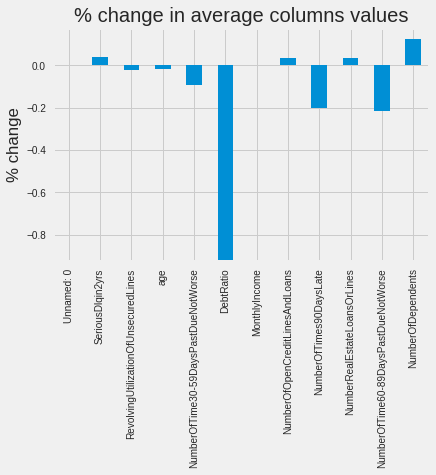

In [15]:
# percentage change in means as a bar chart
ax = ((df_train_dropped.mean() - df_train.mean()) / df_train.mean()).plot(kind="bar", title="% change in average columns values")
ax.set_ylabel("% change")

As shown in the bar chart above, the changes in the dataset features is too significant. 
Hence, dropping the missing rows isnt an option

### fill the MonthyIncome missing values with the mean of the dataset

In [16]:
df_train['MonthlyIncome'].fillna(df_train['MonthlyIncome'][0].mean(), inplace=True)
df_test['MonthlyIncome'].fillna(df_test['MonthlyIncome'][0].mean(), inplace=True)

### fill the NumberOfDependents missing values with the mean of the dataset

In [17]:
df_train['NumberOfDependents'].fillna(df_train['NumberOfDependents'][0].mean(), inplace=True)
df_test['NumberOfDependents'].fillna(df_test['NumberOfDependents'][0].mean(), inplace=True)

### Get Unque Values in every column as well as the Numbers of unique values

In [18]:
## count the number of unique values from selected features
features = ['age',
       'NumberOfTime30-59DaysPastDueNotWorse',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']
for feature in features:
    print('Number of unique {}'.format(feature),df_train[feature].nunique())

Number of unique age 86
Number of unique NumberOfTime30-59DaysPastDueNotWorse 16
Number of unique NumberOfOpenCreditLinesAndLoans 58
Number of unique NumberOfTimes90DaysLate 19
Number of unique NumberRealEstateLoansOrLines 28
Number of unique NumberOfTime60-89DaysPastDueNotWorse 13
Number of unique NumberOfDependents 13


In [19]:
## display the unique values from each feature
unique_feature_values = ['age',
       'NumberOfTime30-59DaysPastDueNotWorse',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']
for feature in unique_feature_values:
    print('Number of unique {}'.format(feature),df_train[feature].unique())
    print()

Number of unique age [ 45  40  38  30  49  74  57  39  27  51  46  76  64  78  53  43  25  32
  58  50  69  24  28  62  42  75  26  52  41  81  31  68  70  73  29  55
  35  72  60  67  36  56  37  66  83  34  44  48  61  80  47  59  77  63
  54  33  79  65  86  92  23  87  71  22  90  97  84  82  91  89  85  88
  21  93  96  99  94  95 101  98 103 102 107 105   0 109]

Number of unique NumberOfTime30-59DaysPastDueNotWorse [ 2  0  1  3  4  5  7 10  6 98 12  8  9 96 13 11]

Number of unique NumberOfOpenCreditLinesAndLoans [13  4  2  5  7  3  8  9  6 10 14 22 17  1 15 31 12 21 11 19 18 26 20 23
  0 16 27 29 28 24 25 32 46 33 30 34 37 38 36 35 54 43 45 49 57 48 40 58
 51 52 39 41 56 42 47 50 44 53]

Number of unique NumberOfTimes90DaysLate [ 0  1  3  2  5  4 98 10  9  6  7  8 15 96 11 13 14 17 12]

Number of unique NumberRealEstateLoansOrLines [ 6  0  1  3  4  2  5  8  7  9 17 15 10 12 11 16 26 14 54 21 18 13 23 29
 25 19 20 32]

Number of unique NumberOfTime60-89DaysPastDueNotWorse [ 0  1

### Data Visualization
The plots shown below attest to the presence of outliers in the dataset

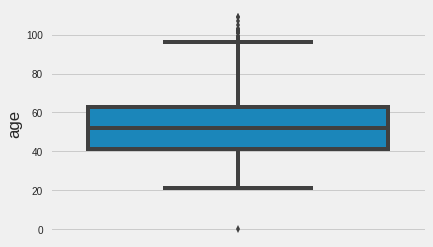

In [20]:
sns.boxplot(y='age' ,data=df_train)

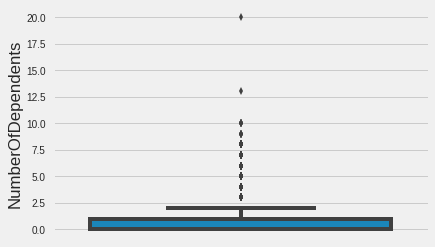

In [21]:
sns.boxplot(y='NumberOfDependents' ,data=df_train)

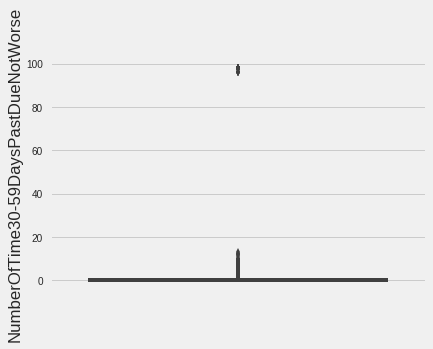

In [22]:
sns.boxplot(y='NumberOfTime30-59DaysPastDueNotWorse' ,data=df_train)

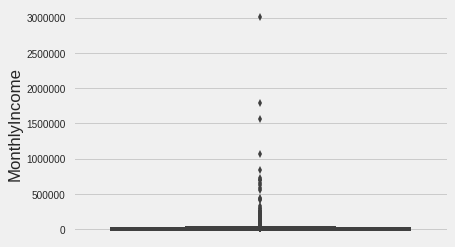

In [23]:
sns.boxplot(y='MonthlyIncome' ,data=df_train)

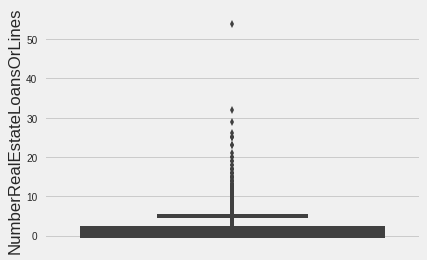

In [24]:
sns.boxplot(y='NumberRealEstateLoansOrLines', data=df_train)

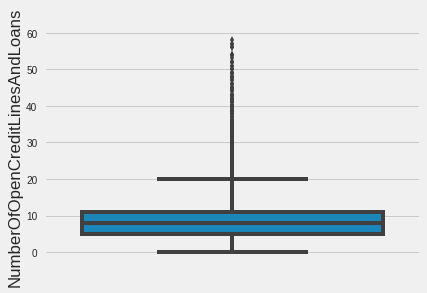

In [25]:
sns.boxplot(y='NumberOfOpenCreditLinesAndLoans' ,data=df_train)

using scatterplot to further check for the presence of outliers

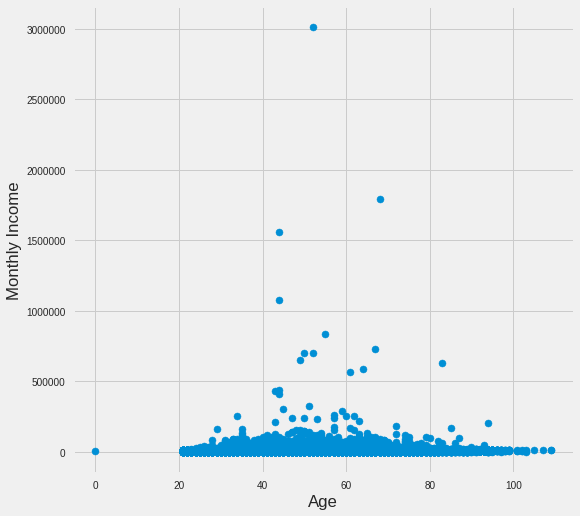

In [26]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(df_train['age'], df_train['MonthlyIncome'])
ax.set_xlabel('Age')
ax.set_ylabel('Monthly Income')
plt.show()

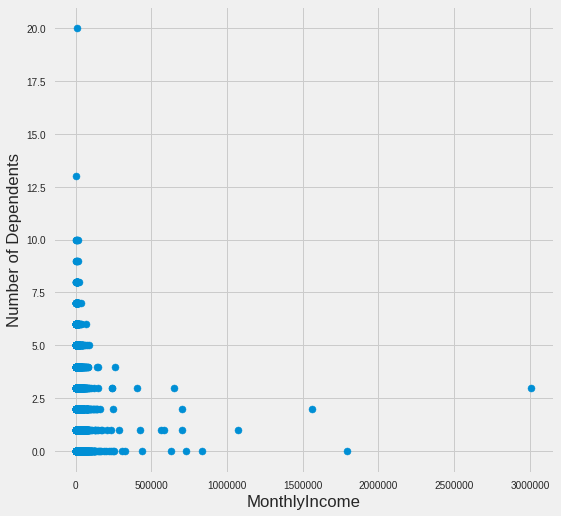

In [27]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(df_train['MonthlyIncome'], df_train['NumberOfDependents'])
ax.set_xlabel('MonthlyIncome')
ax.set_ylabel('Number of Dependents')
plt.show() ### This also confirms the presence of outliers in the dataset

In [28]:
df_train_outliers = df_train.drop('SeriousDlqin2yrs', axis=1)
df_train_target = df_train[['Unnamed: 0','SeriousDlqin2yrs']]

### Using z-score to detect outliers
The Z-score is the signed number of standard deviations by which the value of 
an observation or data point is above the mean value of what is being observed or measured.

In [29]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df_train_outliers))
print(z)

[[1.73203926 0.02115001 0.49385982 ... 4.40954554 0.05785249 1.08239674]
 [1.73201617 0.02038516 0.83234222 ... 0.90128301 0.05785249 0.18805108]
 [1.73199307 0.02158222 0.96773518 ... 0.90128301 0.05785249 0.70629458]
 ...
 [1.73199307 0.02323239 0.38619443 ... 0.01614492 0.05785249 0.70629458]
 [1.73201617 0.02421753 1.50930703 ... 0.90128301 0.05785249 0.70629458]
 [1.73203926 0.02081306 0.79237332 ... 0.86899317 0.05785249 0.70629458]]


In [30]:
threshold = 3
print(np.where(z>3)) ##row and column numbers are displayed

(array([     0,      4,     44, ..., 149899, 149916, 149968]), array([ 8,  5,  6, ..., 10,  6, 10]))


In [31]:
z[0][1]

0.021150011870542273

### Iinterquartile Range (IQR) score to check for outliers
The interquartile range (IQR), also called the midspread or middle 50%, or 
technically H-spread, is a measure of statistical dispersion, being equal 
to the difference between 75th and 25th percentiles, or between upper and 
lower quartiles, IQR = Q3 − Q1.

First calculate the IQR range

In [32]:
Q1 = df_train_outliers.quantile(0.25)
Q3 = df_train_outliers.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Unnamed: 0                              74999.500000
RevolvingUtilizationOfUnsecuredLines        0.529179
age                                        22.000000
NumberOfTime30-59DaysPastDueNotWorse        0.000000
DebtRatio                                   0.693180
MonthlyIncome                            5217.000000
NumberOfOpenCreditLinesAndLoans             6.000000
NumberOfTimes90DaysLate                     0.000000
NumberRealEstateLoansOrLines                2.000000
NumberOfTime60-89DaysPastDueNotWorse        0.000000
NumberOfDependents                          1.000000
dtype: float64


As we now have the IQR scores, it’s time to get hold on outliers. 
The below code will give an output with some true and false values. 
The data point where we have False that means these values 
are valid whereas True indicates presence of an outlier.

In [33]:
x = (df_train < (Q1 - 1.5 * IQR)) |(df_train > (Q3 + 1.5 * IQR))

In [34]:
x.head()

,DebtRatio,MonthlyIncome,NumberOfDependents,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,RevolvingUtilizationOfUnsecuredLines,SeriousDlqin2yrs,Unnamed: 0,age
0,False,False,False,False,True,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,True,False,False,False,False,False,False,False


let's remove the outliers using the z-score previously calculate

In [35]:
df_train_ol = df_train_outliers[(z < 3).all(axis=1)]

In [36]:
df_train_outliers.shape

(150000, 11)

In [37]:
df_train_ol.shape

(144563, 11)

merge the features and target variables back

In [38]:
df_train = pd.merge(df_train_ol, df_train_target, on='Unnamed: 0')

In [39]:
df_train.head()

,Unnamed: 0,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,2,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,0
1,3,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,0
2,4,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,0
3,6,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0,0
4,7,0.305682,57,0,5710.000000,9120.0,8,0,3,0,0.0,0


check again for outliers using boxplot

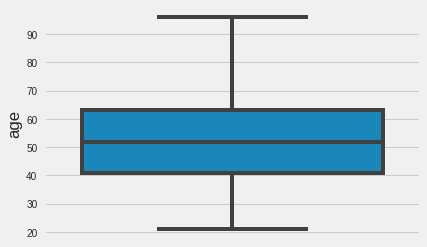

In [40]:
sns.boxplot(y='age' ,data=df_train)

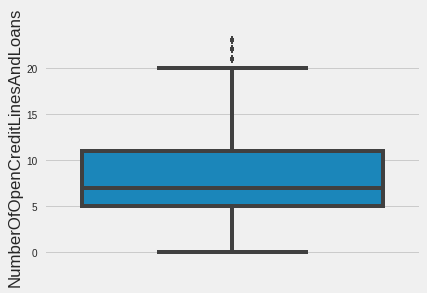

In [41]:
sns.boxplot(y='NumberOfOpenCreditLinesAndLoans' ,data=df_train)

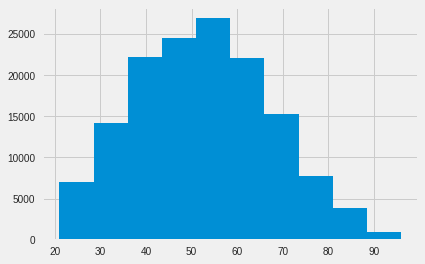

In [42]:
df_train['age'].hist()

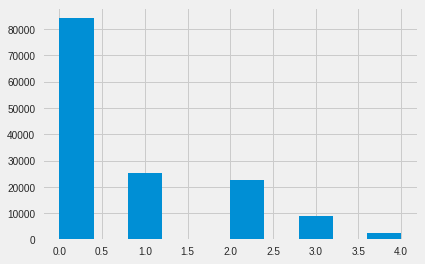

In [43]:
df_train['NumberOfDependents'].hist()

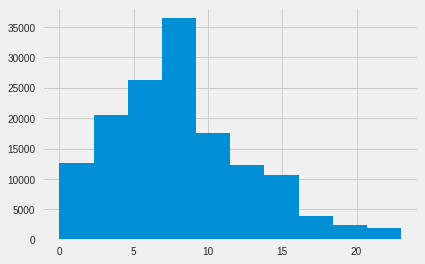

In [44]:
df_train['NumberOfOpenCreditLinesAndLoans'].hist()

### create a new feature (i.e. target variable) called probability from the SeriousDlqin2yrs

In [45]:
df_train['Probability'] = df_train['SeriousDlqin2yrs']

No Financial Distress    0.935004
Financial Distress       0.064996
Name: Probability, dtype: float64


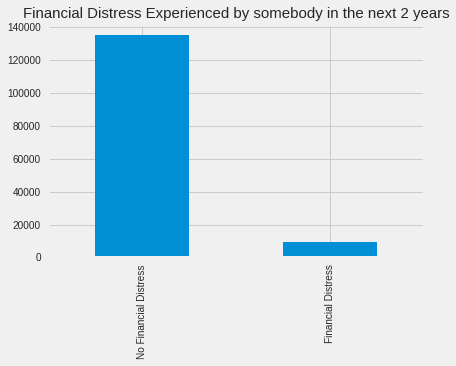

In [46]:
distress_or_not = {1:'Financial Distress', 0:'No Financial Distress'}
df_train['Probability']=df_train['Probability'].replace(distress_or_not)

print(df_train['Probability'].value_counts(normalize=True))
df_train['Probability'].value_counts().plot(kind='bar')
plt.title('Financial Distress Experienced by somebody in the next 2 years', fontsize=15)
plt.figure(figsize=(6,3))
plt.show() 

From the plot above, the data is highly imbalanced i.e. does not follow a normal distribution. We wish to have 
approximately the same number of instance i.e. almost the same number of Distressed and No-distress experience by somebody in the next 2 years

In [47]:
#convert target variables back to integers
promoted_or_not = {'Financial Distress':1,'No Financial Distress':0}
df_train['Probability']=df_train['Probability'].replace(promoted_or_not)

### Relationship between the target variable and the features

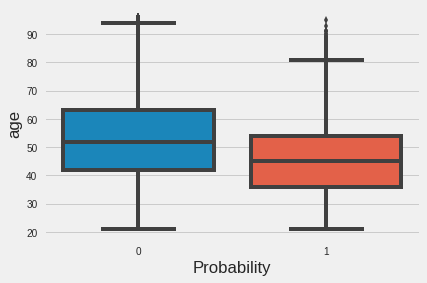

In [48]:
sns.boxplot(x='Probability',y='age',data=df_train)

From the boxplot shown above, we can see that for class 0 (i.e. no financial distress in the last 2 years), the minimum age is 20, median age of about 50, the 75th percentile age is around 65, while 
the maximum age is about 90. Ages above 90 are outliers. The same explanation applies for the probability of class 1. Also, the same explanation applies to the boxplots shown below.

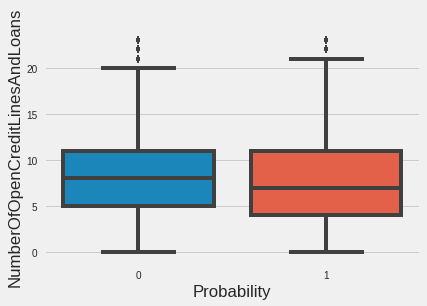

In [49]:
sns.boxplot(x='Probability',y='NumberOfOpenCreditLinesAndLoans',data=df_train)

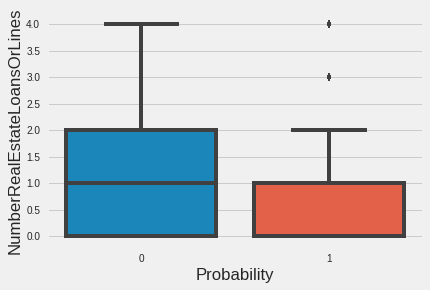

In [50]:
sns.boxplot(x='Probability',y='NumberRealEstateLoansOrLines',data=df_train)

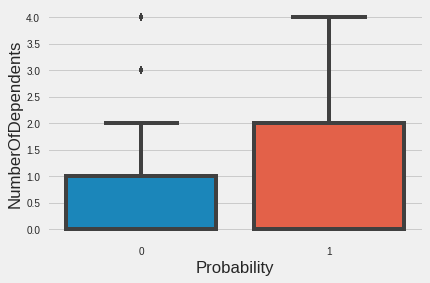

In [51]:
sns.boxplot(x='Probability',y='NumberOfDependents',data=df_train)

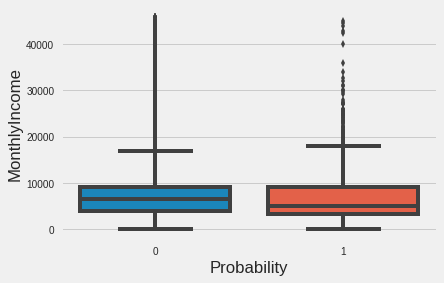

In [52]:
sns.boxplot(x='Probability',y='MonthlyIncome',data=df_train)

### Feature Engineering

In [53]:
# Lets create the row Id for thhe datasets
df_train['Id'] = range(1, len(df_train) + 1)
#rearrange the columns
cols = df_train.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_train = df_train[cols]

In [54]:
# Lets create the row Id for thhe datasets
df_test['Id'] = range(1, len(df_test) + 1)
#rearrange the columns
cols = df_test.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_test = df_test[cols]

In [55]:
## Monthly debt paid
df_train['MonthlyDebtPaid'] = round(df_train['DebtRatio']* df_train['MonthlyIncome'],2)
df_test['MonthlyDebtPaid'] = round(df_test['DebtRatio']* df_test['MonthlyIncome'],2)

In [56]:
#Balance obtained from open credit lines and loans
df_train['BalanceOpenCreditLinesAndLoans'] = df_train['NumberOfOpenCreditLinesAndLoans']*df_train['RevolvingUtilizationOfUnsecuredLines']
df_test['BalanceOpenCreditLinesAndLoans'] = df_test['NumberOfOpenCreditLinesAndLoans']*df_train['RevolvingUtilizationOfUnsecuredLines']

In [57]:
# the ratio of the age to the number of dependents
df_train['AgeRatioDependent'] = round(df_train['age']/(df_train['NumberOfDependents']+1),2)
df_test['AgeRatioDependent'] = round(df_test['age']/(df_test['NumberOfDependents']+1),2)

In [58]:
drop_cols = ['Unnamed: 0', 'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'DebtRatio']
for col in drop_cols:
    df_train.drop([col], axis=1, inplace=True)
    df_test.drop([col], axis=1, inplace=True)

In [59]:
df_train.head()

,Id,age,NumberOfTime30-59DaysPastDueNotWorse,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Probability,MonthlyDebtPaid,BalanceOpenCreditLinesAndLoans,AgeRatioDependent
0,1,40,0,2600.0,4,0,0,0,1.0,0,316.88,3.828604,20.0
1,2,38,1,3042.0,2,1,0,0,0.0,0,258.91,1.316360,38.0
2,3,30,0,3300.0,5,0,0,0,0.0,0,118.96,1.169049,30.0
3,4,74,0,3500.0,3,0,1,0,1.0,0,1314.62,0.639536,37.0
4,5,57,0,9120.0,8,0,3,0,0.0,0,52075200.00,2.445460,57.0


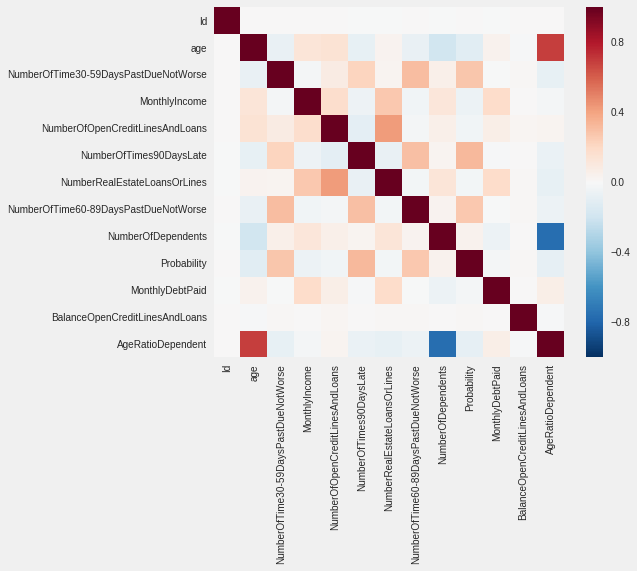

In [60]:
#Heat map, shows the correlation between two features
corrmat= df_train.corr()
f, ax =plt.subplots(figsize=(7,6))
sns.heatmap(corrmat, square=True)

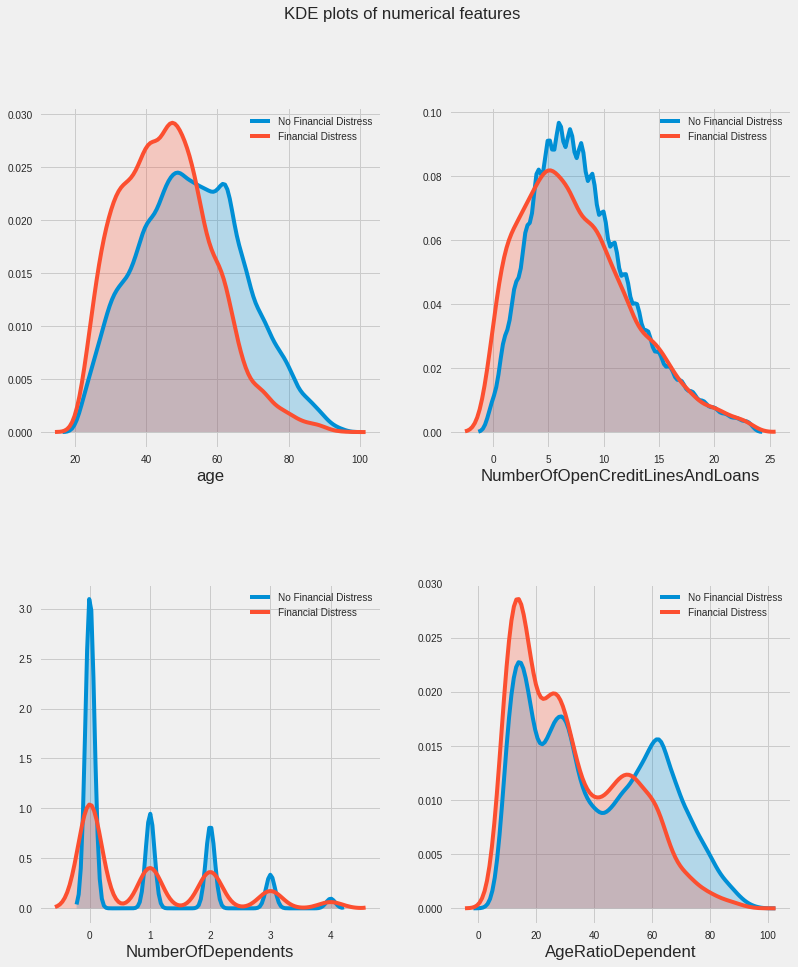

In [61]:
#KDE plot of numerical features
KDE_num_features = ['age',
       'NumberOfOpenCreditLinesAndLoans',
       'NumberOfDependents','AgeRatioDependent']

fig, axes = plt.subplots(ncols = 2, nrows = 2, figsize = (12,14))
fig.subplots_adjust(hspace = 0.4, wspace = 0.2)
fig.suptitle("KDE plots of numerical features")

for ax, col in zip(axes.flatten(), df_train[KDE_num_features]) :
    sns.kdeplot(df_train[df_train['Probability'] == 0][col], shade="True", label="No Financial Distress", ax = ax)
    sns.kdeplot(df_train[df_train['Probability'] == 1][col], shade="True", label="Financial Distress", ax = ax)
    ax.set_xlabel(col)

From the plot, we observed that age, AdeRatioDependent and NumberOfOpenCreditLinesAndLoans have a good class 
separation, which are important features that need to be considered for the prediction of of the distress or not in the next 2 years. 
The other numerical features does not have good class seperation, that was why I decided to remove them.

### correlation between the features and the target variables (ie. prediction)

In [62]:
df_train.corr()['Probability'].sort_values(ascending=False)

Probability                             1.000000
NumberOfTimes90DaysLate                 0.325393
NumberOfTime30-59DaysPastDueNotWorse    0.275009
NumberOfTime60-89DaysPastDueNotWorse    0.271268
NumberOfDependents                      0.042988
BalanceOpenCreditLinesAndLoans          0.010905
Id                                      0.001986
MonthlyDebtPaid                        -0.016677
NumberRealEstateLoansOrLines           -0.028634
NumberOfOpenCreditLinesAndLoans        -0.033153
MonthlyIncome                          -0.058133
AgeRatioDependent                      -0.089835
age                                    -0.114041
Name: Probability, dtype: float64

From the correlatio shown above, we can see that the probability of somebody experience financial distress 
increases as the NumberOfTime30-59DaysPastDueNotWorse, NumberOfTimes90DaysLate, 
NumberOfTime60-89DaysPastDueNotWorse and NumberOfDependents increases. In contrast, the probability of 
somebody experience distress in the next two years increases as
BalanceOpenCreditLinesAndLoans, NumberRealEstateLoansOrLines, MonthlyDebtPaid, MonthlyIncome, 
NumberOfOpenCreditLinesAndLoans, AgeRatioDependent and Age decreases.

### Machine Learning
We need to try several machine learning algrithms to ee which one would give us the best result

In [63]:
from sklearn.model_selection import train_test_split
import sklearn.metrics as sklm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
import sklearn.metrics as sklm
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn import model_selection

In [64]:
X = df_train.drop('Probability', axis=1)
y = df_train.Probability

In [65]:
split_test_size = 0.30
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=split_test_size, random_state=42)

In [66]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df_train.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df_train.index)) * 100))

70.00% in training set
30.00% in test set


In [67]:
test1=df_test

In [68]:
print(X_train.shape)
print(test1.shape)

(101194, 12)
(101503, 12)


In [69]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)
test1=ss.transform(test1)

In [70]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])

In [71]:
reg=LogisticRegression()
reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
probabilities = reg.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5) 

                 Confusion matrix
                 Score positive    Score negative
Actual positive     40251               312
Actual negative      2365               441

Accuracy        0.94
AUC             0.82
Macro precision 0.77
Macro recall    0.57
 
           Positive      Negative
Num case    40563          2806
Precision    0.94          0.59
Recall       0.99          0.16
F1           0.97          0.25


In [73]:
gbr=GradientBoostingClassifier()
gbr.fit(X_train, y_train.ravel())

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [74]:
probabilities = gbr.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)  

                 Confusion matrix
                 Score positive    Score negative
Actual positive     40181               382
Actual negative      2294               512

Accuracy        0.94
AUC             0.87
Macro precision 0.76
Macro recall    0.59
 
           Positive      Negative
Num case    40563          2806
Precision    0.95          0.57
Recall       0.99          0.18
F1           0.97          0.28


mlp=MLPClassifier()
mlp.fit(X_train, y_train)

probabilities = mlp.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)  

In [75]:
rf=RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [76]:
probabilities = rf.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)  

                 Confusion matrix
                 Score positive    Score negative
Actual positive     40126               437
Actual negative      2379               427

Accuracy        0.94
AUC             0.79
Macro precision 0.72
Macro recall    0.57
 
           Positive      Negative
Num case    40563          2806
Precision    0.94          0.49
Recall       0.99          0.15
F1           0.97          0.23


### feature importance in randomforest algorithm

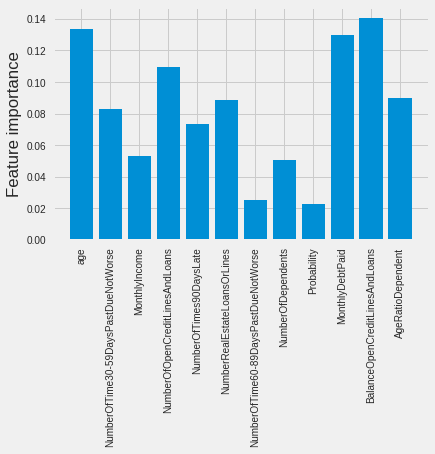

In [77]:
importance = rf.feature_importances_
plt.bar(range(12), importance, tick_label = ['age', 'NumberOfTime30-59DaysPastDueNotWorse', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'Probability', 'MonthlyDebtPaid',
       'BalanceOpenCreditLinesAndLoans', 'AgeRatioDependent'])
plt.xticks(rotation=90)
plt.ylabel('Feature importance')

In [78]:
adb=AdaBoostClassifier()
adb.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [79]:
probabilities = adb.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)  

                 Confusion matrix
                 Score positive    Score negative
Actual positive     40084               479
Actual negative      2265               541

Accuracy        0.94
AUC             0.86
Macro precision 0.74
Macro recall    0.59
 
           Positive      Negative
Num case    40563          2806
Precision    0.95          0.53
Recall       0.99          0.19
F1           0.97          0.28


In [80]:
xgb = xgb.XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [81]:
probabilities = xgb.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)  

                 Confusion matrix
                 Score positive    Score negative
Actual positive     40219               344
Actual negative      2321               485

Accuracy        0.94
AUC             0.87
Macro precision 0.77
Macro recall    0.58
 
           Positive      Negative
Num case    40563          2806
Precision    0.95          0.59
Recall       0.99          0.17
F1           0.97          0.27


In [82]:
solution=xgb.predict_proba(test1)[:,0]
my_submission=pd.DataFrame({'Id':df_test.Id,'Probability': solution})
my_submission.to_csv('XgboostClassifier_Decison_Science_Assessment.csv', index=False)

### feature importance in xgboost algorithm

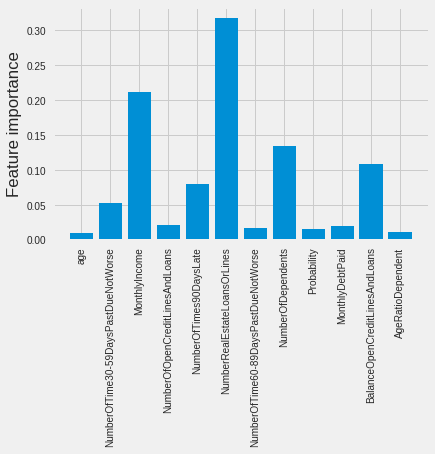

In [83]:
importance = xgb.feature_importances_
plt.bar(range(12), importance, tick_label = ['age', 'NumberOfTime30-59DaysPastDueNotWorse', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'Probability', 'MonthlyDebtPaid',
       'BalanceOpenCreditLinesAndLoans', 'AgeRatioDependent'])
plt.xticks(rotation=90)
plt.ylabel('Feature importance')

Based on importance of feature plot given by the xgb algorithm, the NumberRealEstateLoansOrLines is themost 
important feature for the prediction of the probability that a customer undergoes distress in the last two years,
followed by the MonthlyIncome, then NumberOf Dependents. The least feature that determines the probability is the age

### Machine Learning Algorithms used

After the analysis of the dataset, I tried to predict the probability that somebody will experience financial distress 
in  the next 2 years or not. The cleaned dataset was passed into scikit-learn
standardScaler to scale the dataset, after which it was split into train data and test data with 70%
and 30% respectively. The train data was trained using several machine learning algorithms which
included: Logistic Regression, Gradient Boost Classifier, Ada Boost Classifier, xgboost and
Random Forest Classifier. Although I obtained same accuracy (94%) for xgboost, adaboost and gradientboost classifers, 
the xgboost algorithm gave me the best result, when I considered the precisions and recalls obtained from each of these
algorithms.

### Recommendation and Conclusion
From my obervation, people who experience financial stress are between the age of age of 20 and 80, and
they have more family members that are dependent on them. In addition, they earn meagre sum of money at the end of the month.

Furthemore, the ratio of financial distress/non-financial distress is highly bias, as can be seen in the financial distress vs 
non-financial disress barchart plot. Having more dataset with more people facing financial distress might improve the
performance of our algorithms